In this recipe, I will introduce a new. Median absolute deviation (MAD) in statistics represents a measure of the variability of a univariate (possessing one variable) sample of quantitative data. It is a measure of statistical dispersion. It falls into a group of robust statistics in a way that it is more resilient to outliers.

###### How to do it...

Here's one example that shows how to use MAD to detect outliers in our data. We will perform the following steps for this:

Generate normally distributed random data.

Add in a few outliers.

Use the function is_outlier() to detect the outliers.

Plot both the datasets (x and filtered) to see the difference.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points, threshold=3.5):
    """
   This returns a boolean array with "True" if points are outliers and "False"
    otherwise.
    
   These are the data points with a modified z-score greater than this:
    # value will be classified as outliers.
    """
    # transform into vector
    if len(points.shape) == 1:
        points = points[:,None]

    # compute median value    
    median = np.median(points, axis=0)
    
    # compute diff sums along the axis
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    # compute MAD
    med_abs_deviation = np.median(diff)
    
    # compute modified Z-score
    # http://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm#Iglewicz
    modified_z_score = 0.6745 * diff / med_abs_deviation

    # return a mask for each outlier
    return modified_z_score > threshold

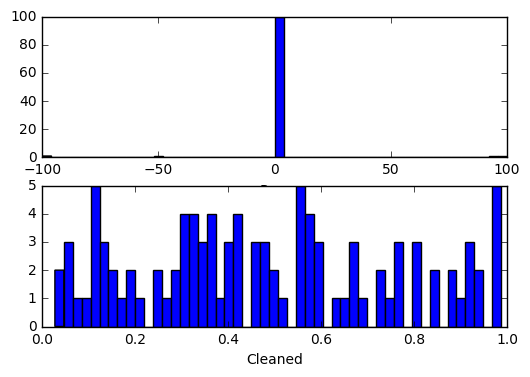

In [2]:
# Random data
x = np.random.random(100)

# histogram buckets
buckets = 50

# Add in a few outliers
x = np.r_[x, -49, 95, 100, -100]

# Keep valid data points
# Note here that
# "~" is logical NOT on boolean numpy arrays
filtered = x[~is_outlier(x)]
# plot histograms
plt.figure()

plt.subplot(211)
plt.hist(x, buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered, buckets)
plt.xlabel('Cleaned')

plt.show()

Note that in NumPy, the ~ operator is overloaded to operate as a logical operator and not on Boolean arrays.

The preceding code produces two distinct histograms. The first one, which has been drawn using all the data, contains one main box with height 100 centered in 0.5 and three other very small boxes. This means that most of the samples were grouped in the first box and the other boxes just contain outliers. Indeed, in the second histogram, which has been drawn without the outliers, we can observe the details of the distribution of the data in the interval 0-1.

Another way to identify outliers is to visually inspect your data. In order to do so, we could create scatter plots, where we could easily spot values that are out of the central swarm or create a box plot, which will display the median, quartiles above and below the median, and points that are distant even from the extremes of the distribution of the data.

The box extends from the lower to the upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the interquartile range. Flier points are those past the end of the whiskers.

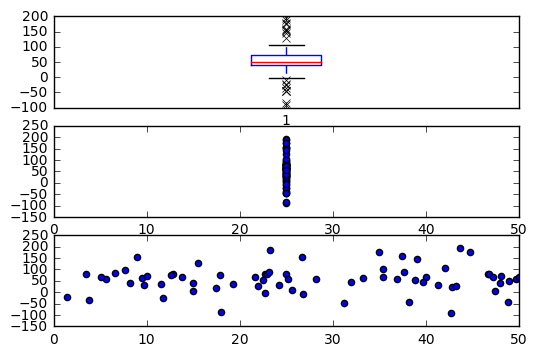

In [4]:
from pylab import *

# fake up some data
spread= rand(50) * 100
center = ones(25) * 50

# generate some outliers high and low
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
 
# merge generated data set
data = concatenate((spread, center, flier_high, flier_low), 0)

subplot(311)
# basic plot
# 'gx' defining the outlier plotting properties
boxplot(data, 0, 'gx')

# compare this with similar scatter plot
subplot(312)
spread_1 = concatenate((spread, flier_high, flier_low), 0)
center_1 = ones(70) * 25
scatter(center_1, spread_1)
xlim([0, 50])

# and with another that is more appropriate for
# scatter plot
subplot(313)
center_2 = rand(70) * 50
scatter(center_2, spread_1)
xlim([0, 50])

show()
#We can then see x-shaped markers representing outliers, as shown in the following table:

We can also see that the second plot showing a similar dataset in the scatter plot is not very intuitive because the x axis has all the values at 25 and we don't really distinguish between inliers and outliers.

The third plot, where we generated values on the x axis to be spread across the range from 0 to 50, gives us more visibility of the different values and we can see what values are outliers in terms of the y axis.